# Regresion Simple


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

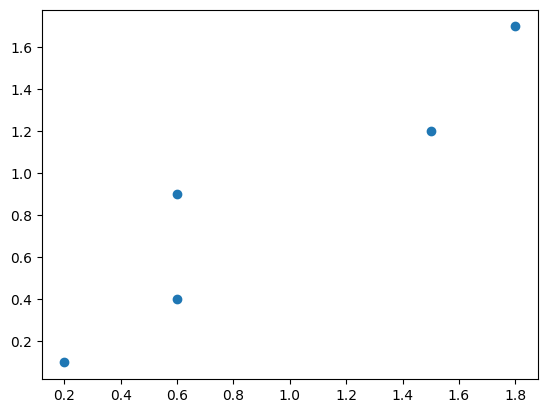

In [ ]:
x = np.array([0.2,0.6,0.6,1.5,1.8])
y = np.array([0.1,0.4,0.9,1.2,1.7])
plt.scatter(x,y)


In [ ]:
X_train, y_train = np.array([0.6,1.8]), np.array([0.4,1.7])
X_test, y_test = np.array([0.2, 0.6, 1.5]), np.array([0.1, 0.9, 1.2])

In [ ]:
from sklearn.linear_model import LinearRegression
X_train.resize(len(X_train),1) #Que tenga la segunda dimension explicita, por que los modelos de aprendizaje requiere esto , casi siempre se hace para que ajuste bien
y_train.resize(len(y_train),1)
X_test.resize(len(X_test),1)
y_test.resize(len(y_test),1)

In [ ]:
modelo = LinearRegression()
modelo.fit(X_train,y_train)
coefs = modelo.coef_[0]
intercept = modelo.intercept_[0]
print('y = {:.3f} + {:.3f}x'.format(intercept,coefs[0]))

y = -0.250 + 1.083x


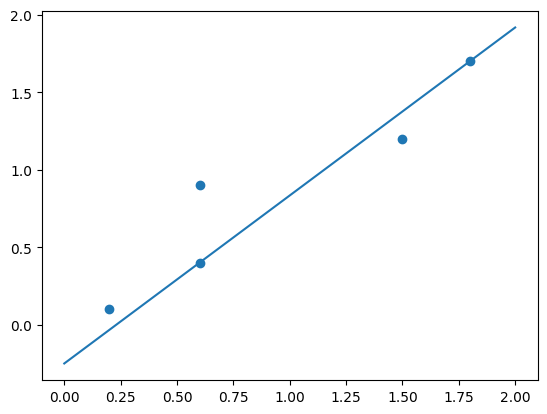

In [ ]:
xx = np.linspace(0,2,100)
yy = modelo.predict(xx.reshape(len(xx),1))
plt.scatter(x,y)
plt.plot(xx,yy)

In [ ]:
from sklearn.metrics import mean_squared_error as mse
print('Error : ', mse(y_test, modelo.predict(X_test)))

Error :  0.09946759259259248


In [ ]:
from sklearn.linear_model import Ridge
modelo2 = Ridge(alpha=0.3)
modelo2.fit(X_train, y_train)
coefs = modelo2.coef_[0]
intercept = modelo2.intercept_[0]
print('y = {:.3f} + {:.3f}x'.format(intercept,coefs[0]))
print('Error : ', mse(y_test, modelo2.predict(X_test)))

y = 0.132 + 0.765x
Error :  0.04533737024221454


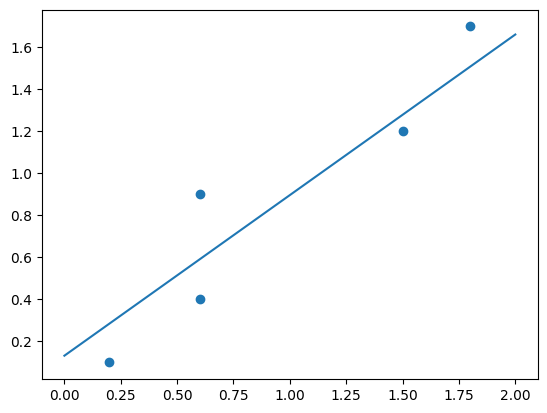

In [ ]:
xx = np.linspace(0,2,100)
yy = modelo2.predict(xx.reshape(len(xx),1))
plt.scatter(x,y)
plt.plot(xx,yy)

# Regresion Polinomial

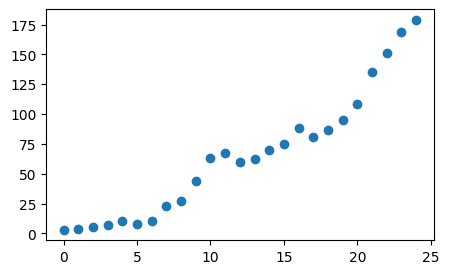

In [ ]:
y = [3, 4, 5, 7, 10, 8, 10, 23, 27, 44, 63, 67, 60, 62, 70, 75, 88, 81,
     87, 95, 108, 135, 151, 169, 179]
x = np.arange(len(y))
plt.figure(figsize=(5,3))
plt.scatter(x,y)
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
# Genera las nuevas caracteristcias
poly_features = poly.fit_transform(x.reshape(-1,1))
poly_features

array([[  0.,   0.],
       [  1.,   1.],
       [  2.,   4.],
       [  3.,   9.],
       [  4.,  16.],
       [  5.,  25.],
       [  6.,  36.],
       [  7.,  49.],
       [  8.,  64.],
       [  9.,  81.],
       [ 10., 100.],
       [ 11., 121.],
       [ 12., 144.],
       [ 13., 169.],
       [ 14., 196.],
       [ 15., 225.],
       [ 16., 256.],
       [ 17., 289.],
       [ 18., 324.],
       [ 19., 361.],
       [ 20., 400.],
       [ 21., 441.],
       [ 22., 484.],
       [ 23., 529.],
       [ 24., 576.]])

In [ ]:
# Modelo lineal
from sklearn.linear_model import LinearRegression
poly_linreg = LinearRegression()
poly_linreg.fit(poly_features, y)
y_hat = poly_linreg.predict(poly_features)
poly_linreg.coef_, poly_linreg.intercept_

(array([1.73143813, 0.21727982]), 1.8758974358974427)

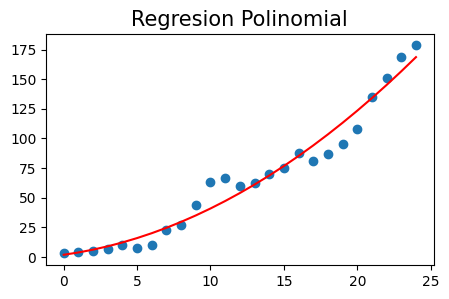

In [ ]:
plt.figure(figsize=(5,3))
plt.scatter(x,y)
plt.plot(x, y_hat, color='red')
plt.title('Regresion Polinomial',size=15)
plt.show()

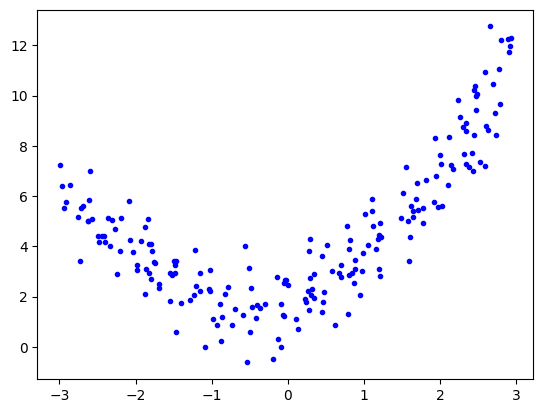

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = 6 * np.random.rand(200,1) - 3
y = 0.8*x**2 + 0.9*x + 2 + np.random.randn(200,1)
plt.plot(x,y,'b.')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [ ]:
#Modelo lineal puro
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred =  lr.predict(X_test)
print('R2 :', r2_score(y_test, y_pred))
print('RMSE' , np.sqrt(mean_squared_error(y_test, y_pred)))

R2 : 0.302822538647884
RMSE 2.416757622805873


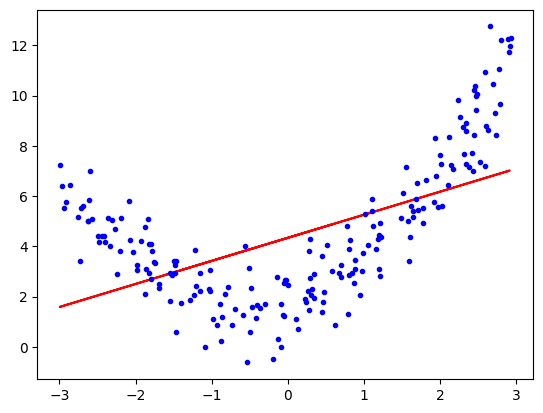

In [ ]:
plt.plot(X_train, lr.predict(X_train), color='red')
plt.plot(x, y, '.b')
plt.show()

In [ ]:
# Polinomio grado 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# Modelo lineal para poly_reg
lr2 = LinearRegression()
lr2.fit(X_train_poly, y_train)
y_pred_poly = lr2.predict(X_test_poly)
print('R2 :', r2_score(y_test, y_pred_poly))
print('RMSE' , np.sqrt(mean_squared_error(y_test, y_pred_poly)))

R2 : 0.8639126614278577
RMSE 1.0677517408624229


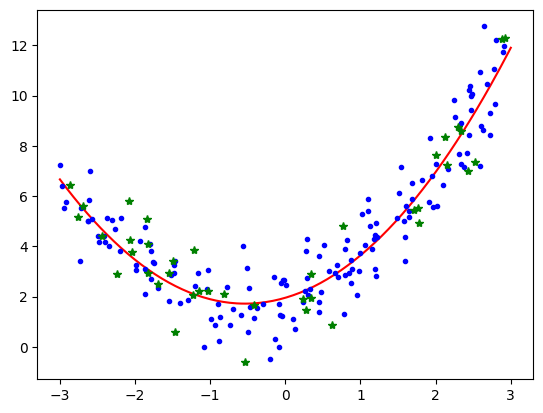

In [ ]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new_pred = lr2.predict(X_new_poly)
plt.plot(X_new, y_new_pred, color='red')
plt.plot(X_train, y_train, '.b', label='Training data')
plt.plot(X_test, y_test, 'g*', label='Test data')
plt.show()

In [ ]:
# Polinomio grado 3
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly3.fit_transform(X_train)
X_test_poly = poly3.transform(X_test)
# Modelo lineal para poly_reg
lr3 = LinearRegression()
lr3.fit(X_train_poly, y_train)
y_pred_poly = lr3.predict(X_test_poly)
print('R2 :', r2_score(y_test, y_pred_poly))
print('RMSE' , np.sqrt(mean_squared_error(y_test, y_pred_poly)))

R2 : 0.8649500189305763
RMSE 1.0636743623703406


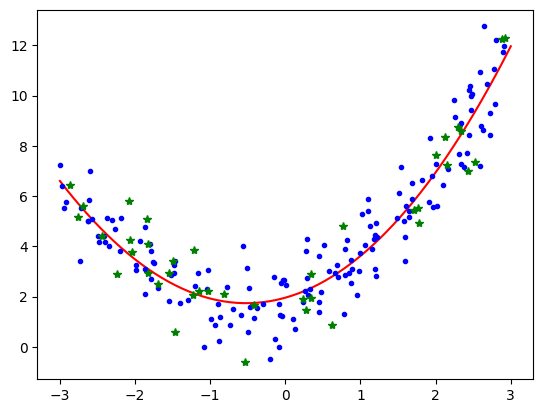

In [ ]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly3.transform(X_new) # Use poly3 which was fitted with degree=3
y_new_pred = lr3.predict(X_new_poly)
plt.plot(X_new, y_new_pred, color='red')
plt.plot(X_train, y_train, '.b', label='Training data')
plt.plot(X_test, y_test, 'g*', label='Test data')
plt.show()

## PolyReg múltiples características

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
np.random.seed(42)
x1 = np.absolute(np.random.randn(100,1) * 10)
x2 = np.absolute(np.random.randn(100,1) * 30)
y = 2*x1**2 + 3*x1 + 2 + np.random.rand(100,1)*20

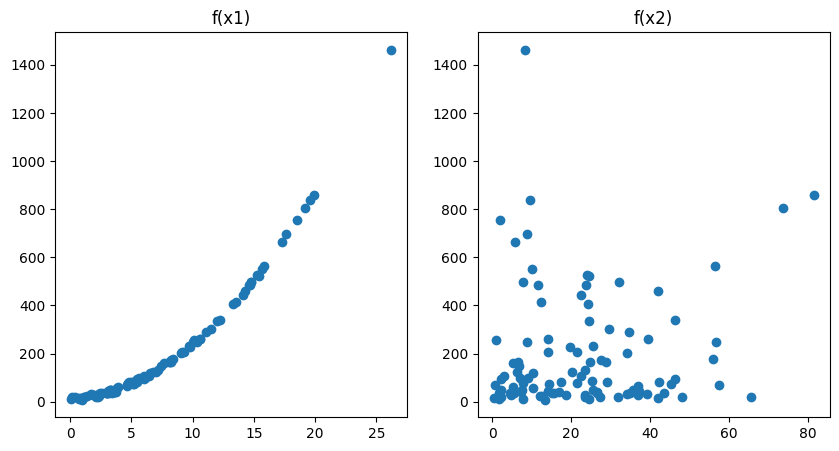

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].scatter(x1,y)
axes[1].scatter(x2,y)
axes[0].set_title('f(x1)')
axes[1].set_title('f(x2)')
plt.show()

In [ ]:
df = pd.DataFrame({'x1':x1.reshape(100,), 'x2':x2.reshape(100,),
                   'y':y.reshape(100,)}, index= range(0,100))

In [ ]:
df.head()

,x1,x2,y
0,4.967142,42.461122,83.793876
1,1.382643,12.619360,24.786705
2,6.476885,10.281435,119.271059
3,15.230299,24.068318,525.664566
4,2.341534,4.838571,27.179985


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
X, y = df[['x1','x2']], df.y
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_features = poly.fit_transform(X)
X_train, X_test, y_train , y_test = train_test_split(X_poly_features, y,
                                                     test_size=0.3, random_state = 42)

In [ ]:
#Modelo lineal
from sklearn.linear_model import LinearRegression
poly_reg = LinearRegression()

In [ ]:
#Ajuste y prediccion
poly_reg.fit(X_train, y_train)
y_hat = poly_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
rmse

5.174345382229926

In [ ]:
poly_reg.coef_

array([ 3.21129486, -0.16058118,  1.99740857, -0.00745818,  0.00353855])

In [ ]:
# vs modelo de regresion lineal puro
X_train, X_test, y_train , y_test = train_test_split(X, y,
                                                     test_size=0.3, random_state = 42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_ped = lin_reg.predict(X_test)
rsme = np.sqrt(mean_squared_error(y_test, y_ped))
rsme

61.80630370688501